In [ ]:
# Install required libraries within the Jupyter Notebook
%pip install pandas matplotlib seaborn numpy scipy sklearn
%pip install -U imbalanced-learn
%pip install imbalanced-learn scikit-learn
%pip install imbens
%pip install -U imbalanced-learn


In [1]:
from imblearn.combine import SMOTEENN
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r'C:\Users\Syrym\Downloads\taiwanese+bankruptcy+prediction\data.csv')

Check the distribution of the target variable

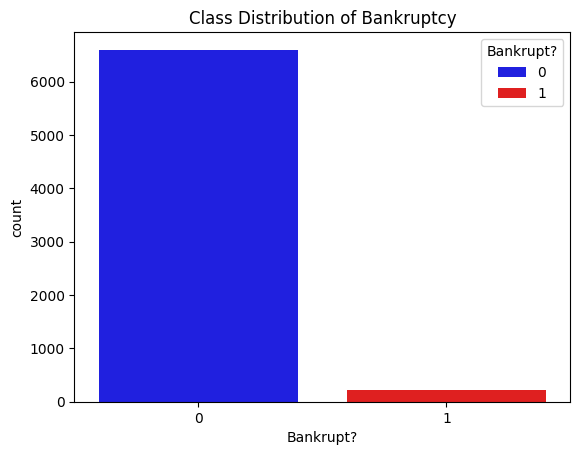

Bankrupt?
0    6599
1     220
Name: count, dtype: int64


In [30]:

# Plot the class distribution with different colors for each class
sns.countplot(x='Bankrupt?', data=df, hue='Bankrupt?')
plt.title('Class Distribution of Bankruptcy')
plt.show()



In [27]:
# Check for constant values in each column
constant_columns = df.columns[df.nunique() == 1]

# Print columns with constant values
print("Columns with constant values:", constant_columns)
df = df.drop(columns=constant_columns)

Columns with constant values: Index([' Net Income Flag'], dtype='object')


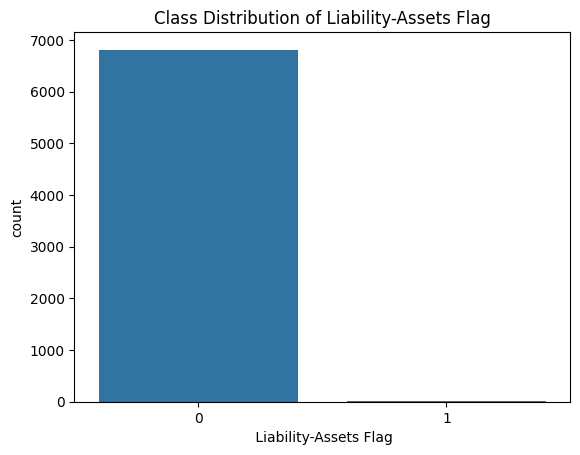

 Liability-Assets Flag
0    6811
1       8
Name: count, dtype: int64


In [6]:
class_distributionLiability_Assets_Flag = df[' Liability-Assets Flag'].value_counts()

# Plot the class distribution
sns.countplot(x=' Liability-Assets Flag', data=df)
plt.title('Class Distribution of Liability-Assets Flag')
plt.show()

# Print the counts
print(class_distributionLiability_Assets_Flag)

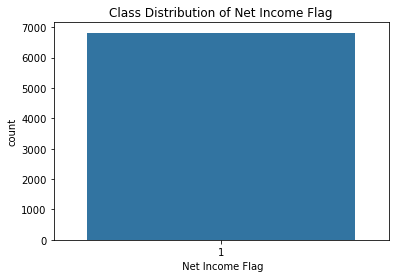

1    6819
Name:  Net Income Flag, dtype: int64


In [12]:
class_distributionNetIncomeFlag = df[' Net Income Flag'].value_counts()

# Plot the class distribution
sns.countplot(x=' Net Income Flag', data=df)
plt.title('Class Distribution of Net Income Flag')
plt.show()

# Print the counts
print(class_distributionNetIncomeFlag)

In [7]:
# Assuming 'df' is your DataFrame
column_names = df.columns

# Print all column names
print("Column names in the DataFrame:")
print(column_names)

Column names in the DataFrame:
Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth R

In [25]:

target_feature = df.columns[0]

# Calculate the correlation of all features with the target feature
correlation_with_target = df.corr()[target_feature]

# Print the correlations
print(f"Correlations with {target_feature}:")
for feature, correlation in correlation_with_target.items():
    print(f"{feature}: {correlation:.2f}")


Correlations with Bankrupt?:
Bankrupt?: 1.00
 ROA(C) before interest and depreciation before interest: -0.26
 ROA(A) before interest and % after tax: -0.28
 ROA(B) before interest and depreciation after tax: -0.27
 Operating Gross Margin: -0.10
 Realized Sales Gross Margin: -0.10
 Operating Profit Rate: -0.00
 Pre-tax net Interest Rate: -0.01
 After-tax net Interest Rate: -0.01
 Non-industry income and expenditure/revenue: -0.02
 Continuous interest rate (after tax): -0.01
 Operating Expense Rate: -0.01
 Research and development expense rate: -0.02
 Cash flow rate: -0.07
 Interest-bearing debt interest rate: -0.02
 Tax rate (A): -0.11
 Net Value Per Share (B): -0.17
 Net Value Per Share (A): -0.17
 Net Value Per Share (C): -0.16
 Persistent EPS in the Last Four Seasons: -0.22
 Cash Flow Per Share: -0.08
 Revenue Per Share (Yuan ¥): -0.00
 Operating Profit Per Share (Yuan ¥): -0.14
 Per Share Net profit before tax (Yuan ¥): -0.20
 Realized Sales Gross Profit Growth Rate: -0.00
 Operatin

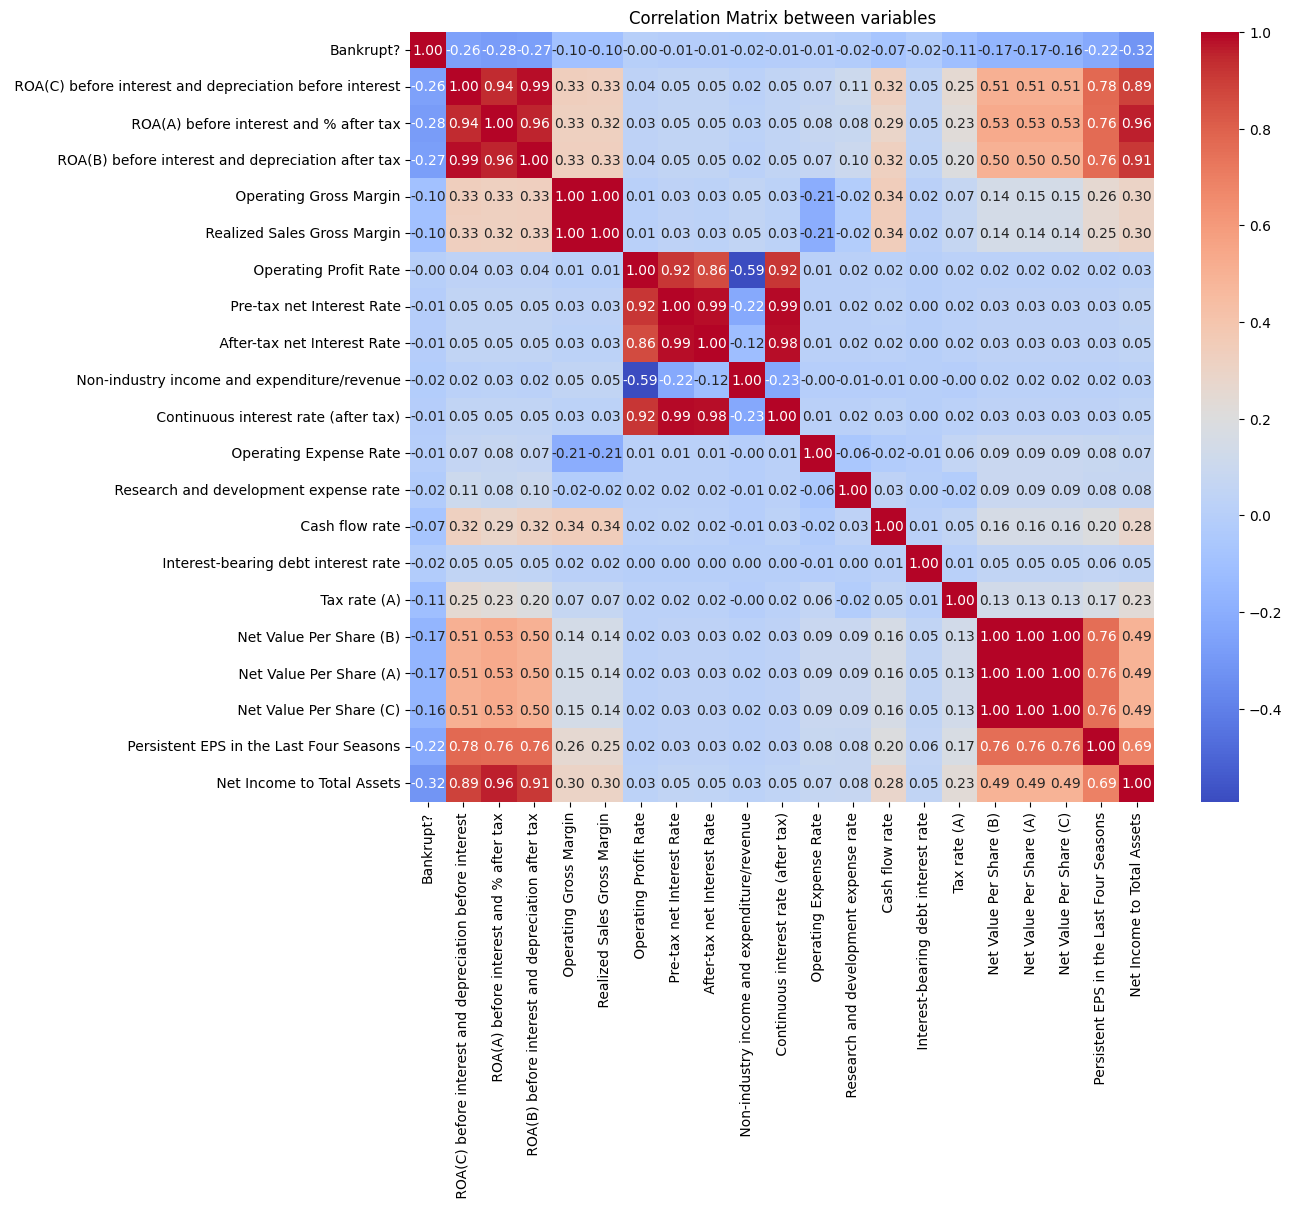

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
# Replace 'Your_Column_Name' with the actual column name if it's different
net_income_column = ' Net Income to Total Assets'  # Replace with the actual name
# Assuming 'df' is your DataFrame
# Select the first 20 columns including the target feature if it's within the first 20
selected_columns = df.columns[:20].tolist()
# Adding the specified column to the list, ensuring no duplicates
if net_income_column not in selected_columns:
    selected_columns.append(net_income_column)
# Calculate the correlation matrix for the selected columns
selected_correlation_matrix = df[selected_columns].corr()

# Plotting the heatmap for the correlation matrix of the selected columns
plt.figure(figsize=(12, 10))
sns.heatmap(selected_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix between variables")
plt.show()


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
target_feature = df.columns[0]

# Calculate the correlation of all features with the target feature
correlation_with_target = df.corr()[target_feature]

# Print the correlations with the target feature
print(f"Correlations with {target_feature}:")
for feature, correlation in correlation_with_target.items():
    print(f"{feature}: {correlation:.2f}")

# Printing the entire correlation matrix
print("\nComplete Correlation Matrix:")
print(df.corr())


Correlations with Bankrupt?:
Bankrupt?: 1.00
 ROA(C) before interest and depreciation before interest: -0.26
 ROA(A) before interest and % after tax: -0.28
 ROA(B) before interest and depreciation after tax: -0.27
 Operating Gross Margin: -0.10
 Realized Sales Gross Margin: -0.10
 Operating Profit Rate: -0.00
 Pre-tax net Interest Rate: -0.01
 After-tax net Interest Rate: -0.01
 Non-industry income and expenditure/revenue: -0.02
 Continuous interest rate (after tax): -0.01
 Operating Expense Rate: -0.01
 Research and development expense rate: -0.02
 Cash flow rate: -0.07
 Interest-bearing debt interest rate: -0.02
 Tax rate (A): -0.11
 Net Value Per Share (B): -0.17
 Net Value Per Share (A): -0.17
 Net Value Per Share (C): -0.16
 Persistent EPS in the Last Four Seasons: -0.22
 Cash Flow Per Share: -0.08
 Revenue Per Share (Yuan ¥): -0.00
 Operating Profit Per Share (Yuan ¥): -0.14
 Per Share Net profit before tax (Yuan ¥): -0.20
 Realized Sales Gross Profit Growth Rate: -0.00
 Operatin

Text(0.5, 1.0, "Heatmap of Selected Correlations including ' Net Income to Total Assets'")

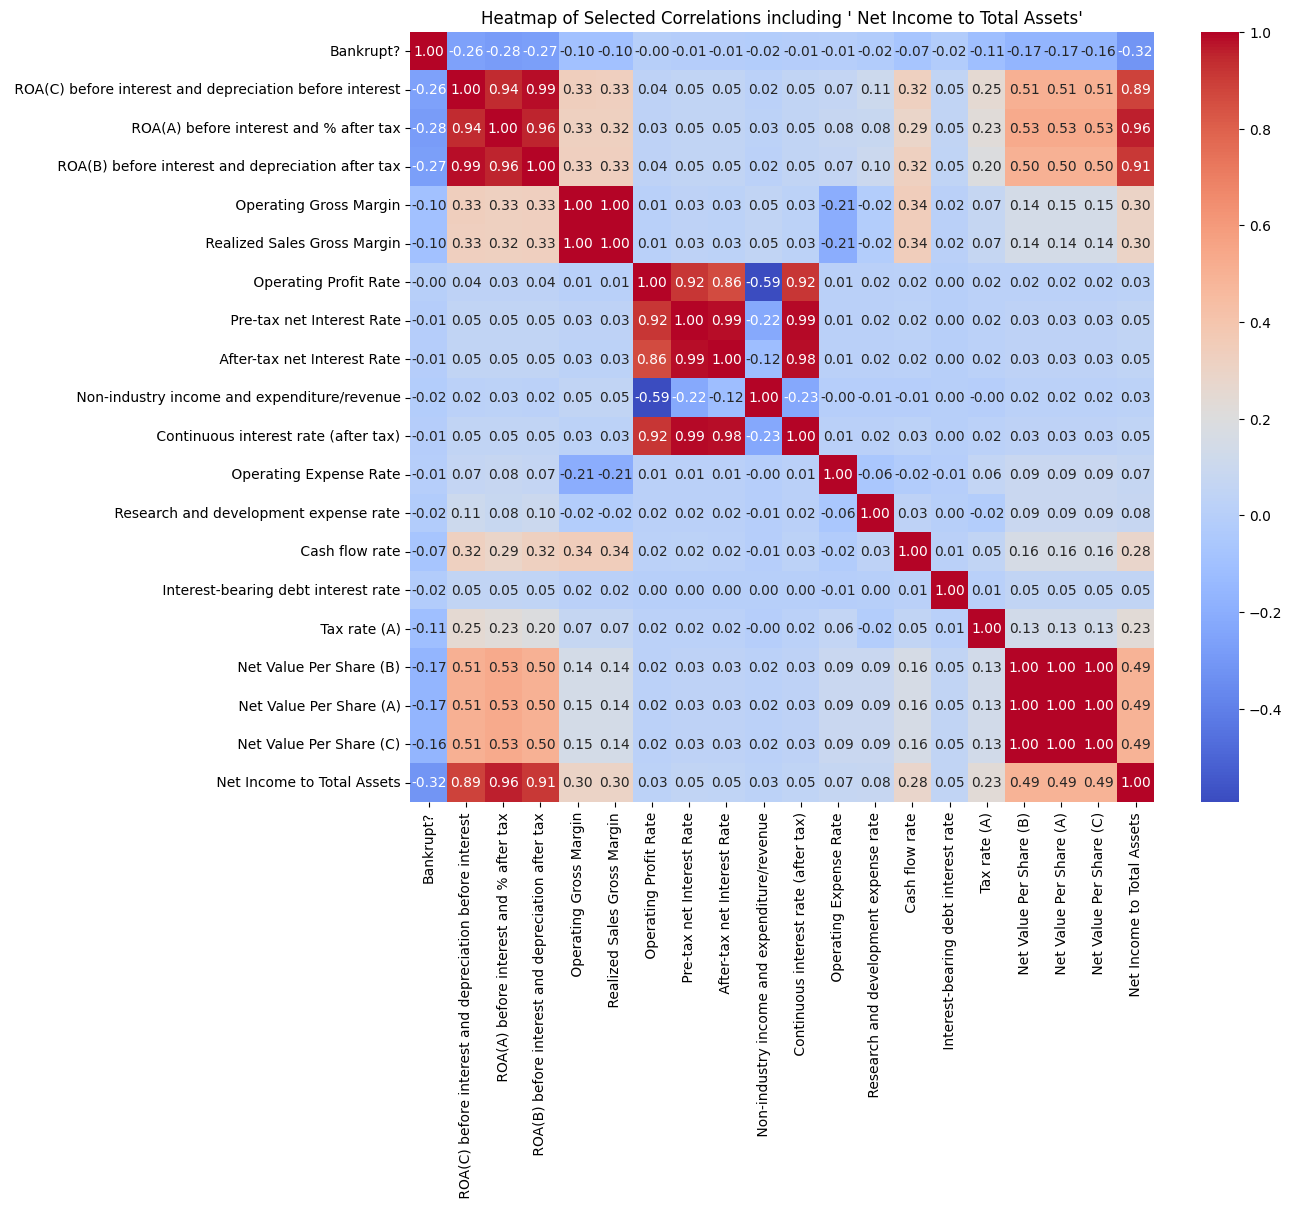

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'Your_Column_Name' with the actual column name if it's different
net_income_column = ' Net Income to Total Assets'  # Replace with the actual name

# Assuming 'df' is your DataFrame
# Selecting the first 19 columns
selected_columns = df.columns[:19].tolist()

# Adding the specified column to the list, ensuring no duplicates
if net_income_column not in selected_columns:
    selected_columns.append(net_income_column)

# Selecting the relevant part of the correlation matrix
selected_correlation_matrix = df[selected_columns].corr()

# Plotting the heatmap for the selected correlations
plt.figure(figsize=(12, 10))
sns.heatmap(selected_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title(f"Heatmap of Selected Correlations including '{net_income_column}'")


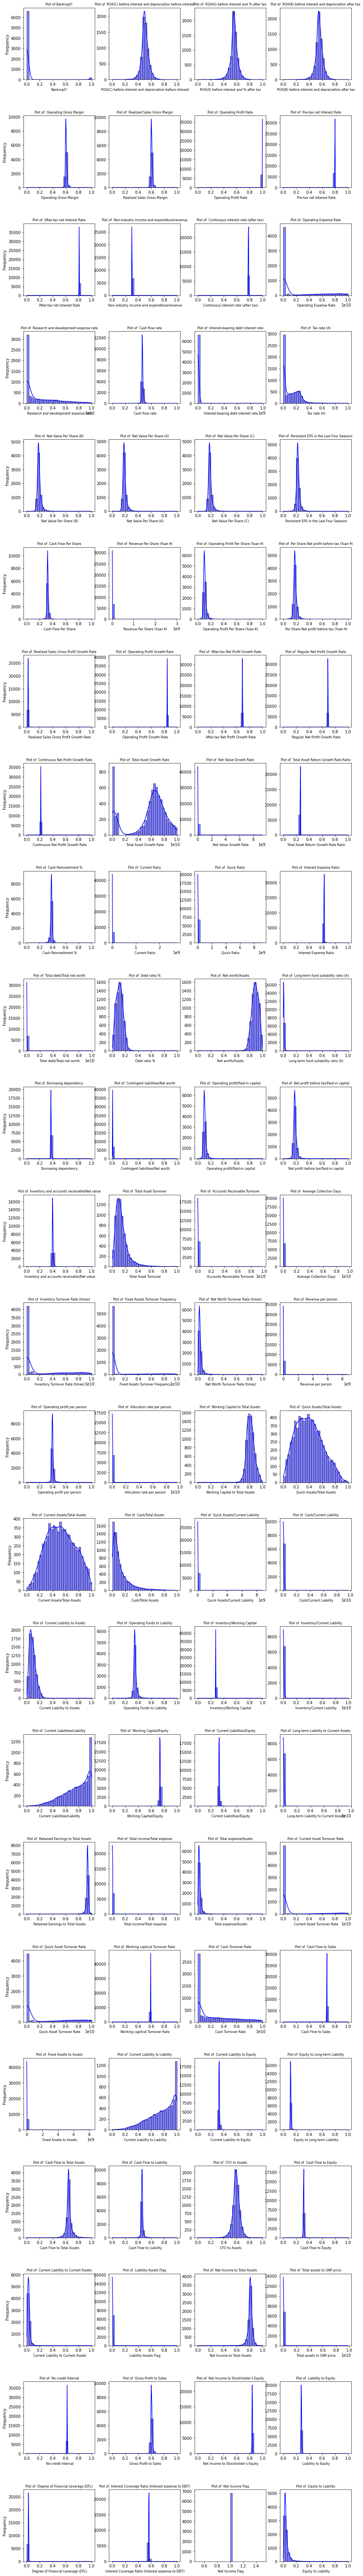

In [14]:
columns_of_df = df.columns

# Set the number of columns per row
num_cols_per_row = 4

# Calculate the number of rows needed
num_rows = (len(columns_of_df) + num_cols_per_row - 1) // num_cols_per_row


fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(15, 5 * num_rows))
fig.subplots_adjust(hspace=0.5)

# Plot histogram with kernel density plot for columns in df
for i, column in enumerate(columns_of_df):
    ax = axes[i // num_cols_per_row, i % num_cols_per_row]
    sns.histplot(df[column], bins=30, kde=True, color='blue', ax=ax)
    ax.set_title(f'Plot of {column}', fontsize=8)  # 
    ax.set_xlabel(column, fontsize=8) 
    ax.set_ylabel('Frequency' if i % num_cols_per_row == 0 else '') 


for i in range(len(columns_of_df), num_rows * num_cols_per_row):
    fig.delaxes(axes.flatten()[i])

plt.show()


Grid of boxplot for all variables in the dataset